FSO communication Under different Weather conditions.

Needed Constants and modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
transmitter_power = 10  # in dBm
receiver_sensitivity = -30  # in dBm
wavelength = 1550e-9  # in meters (1550 nm)
link_distances = np.arange(500, 5001, 500)  # in meters (500m to 5km in steps of 500m)
modulation_scheme = 'OOK'  # On-Off Keying
# Convert transmitter power from dBm to linear scale
transmitter_power_linear = 10**(transmitter_power / 10)


Atmospheric_channel

In [4]:
def atmospheric_channel(sigma_R):
    """
    Simulate the atmospheric channel using log-normal distribution.
    
    :param sigma_R: Rytov variance (measure of turbulence strength)
    :return: Channel gain
    """
    mean_log_amplitude = -0.5 * sigma_R**2
    std_log_amplitude = sigma_R
    
    log_amplitude = np.random.normal(mean_log_amplitude, std_log_amplitude)
    channel_gain = np.exp(log_amplitude)
    
    return channel_gain


Simulation of the link

In [5]:
def simulate_fso_link(transmitter_power_linear, channel_gain, receiver_sensitivity_linear, distance, attenuation_db_per_km):
    """
    Simulate the FSO link.
    
    :param transmitter_power_linear: Transmitter power in linear scale
    :param channel_gain: Channel gain from the atmospheric channel
    :param receiver_sensitivity_linear: Receiver sensitivity in linear scale
    :param distance: Link distance in meters
    :param attenuation_db_per_km: Atmospheric attenuation in dB/km
    :return: Received power
    """
    # Atmospheric attenuation
    attenuation_linear = 10**(attenuation_db_per_km * distance / 1000 / 10)
    
    received_power = transmitter_power_linear * channel_gain / attenuation_linear
    return received_power

__main__

In [9]:
# Convert receiver sensitivity from dBm to linear scale
receiver_sensitivity_linear = 10**(receiver_sensitivity / 10)

# Weather conditions and corresponding parameters
weather_conditions = {
    'Clear': {'sigma_R': 0.1, 'attenuation_db_per_km': 0.43},
    'Moderate': {'sigma_R': 0.3, 'attenuation_db_per_km': 3},
    'Heavy': {'sigma_R': 0.8, 'attenuation_db_per_km': 15}
}

# Number of simulations
num_simulations = 1000

# Storage for results
results = {}

for condition, params in weather_conditions.items():
    sigma_R = params['sigma_R']
    attenuation_db_per_km = params['attenuation_db_per_km']
    
    received_powers = []
    success_rates = []
    
    for distance in link_distances:
        distance_received_powers = []
        success_count = 0
        for _ in range(num_simulations):
            channel_gain = atmospheric_channel(sigma_R)
            received_power = simulate_fso_link(transmitter_power_linear, channel_gain, receiver_sensitivity_linear, distance, attenuation_db_per_km)
            distance_received_powers.append(received_power)
            if received_power >= receiver_sensitivity_linear:
                success_count += 1
        received_powers.append(distance_received_powers)
        success_rate = success_count / num_simulations
        success_rates.append(success_rate)
    
    results[condition] = {
        'received_powers': received_powers,
        'success_rates': success_rates
    }


 Plot Link Success Rate vs. Distance for different weather conditions

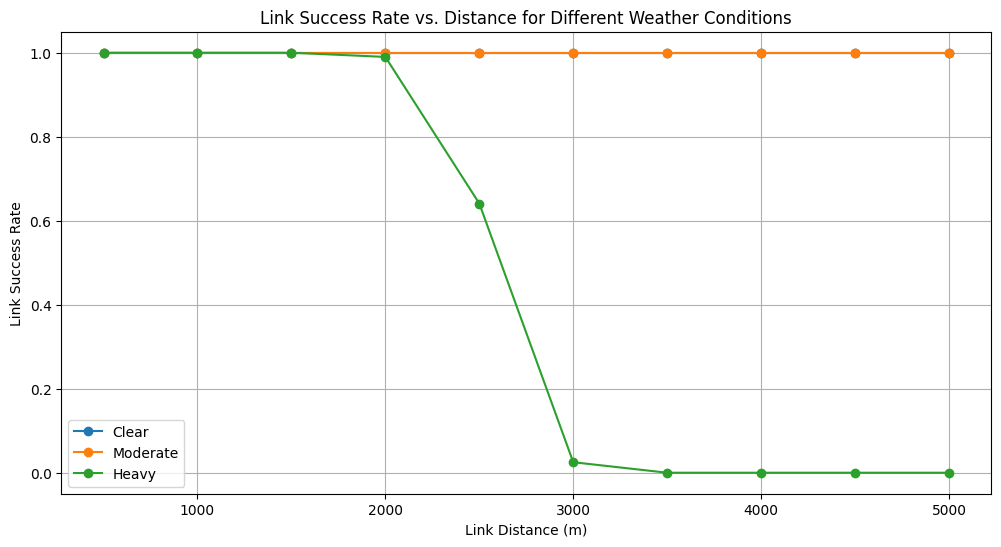

In [10]:
plt.figure(figsize=(12, 6))
for condition, data in results.items():
    plt.plot(link_distances, data['success_rates'], marker='o', linestyle='-', label=condition)
plt.xlabel('Link Distance (m)')
plt.ylabel('Link Success Rate')
plt.title('Link Success Rate vs. Distance for Different Weather Conditions')
plt.legend()
plt.grid(True)
plt.show()

Plot Received Power Distribution for different weather conditions at a specific distances

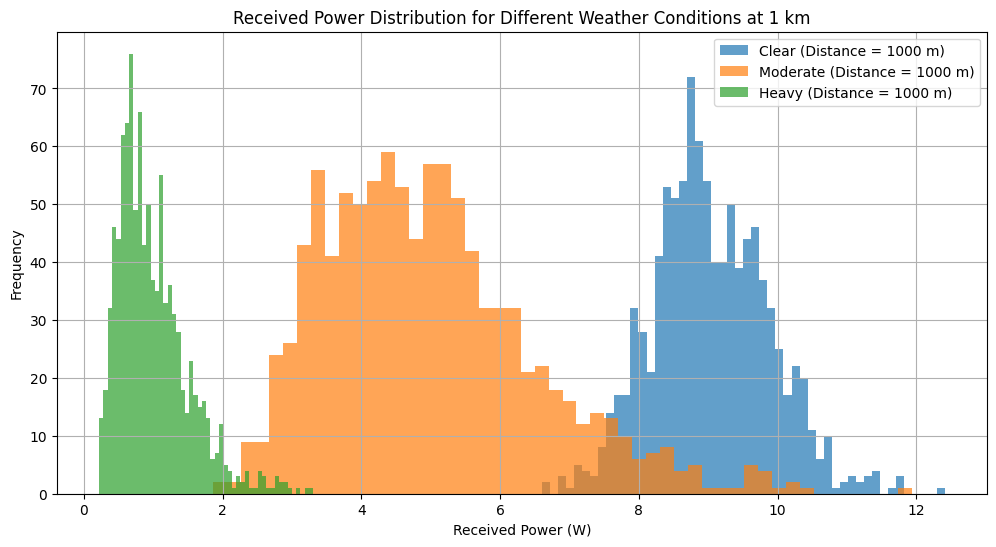

In [8]:
distance_index = 1  # Index for 1 km (second entry in link_distances array)
plt.figure(figsize=(12, 6))
for condition, data in results.items():
    plt.hist(data['received_powers'][distance_index], bins=50, alpha=0.7, label=f'{condition} (Distance = {link_distances[distance_index]} m)')
plt.xlabel('Received Power (W)')
plt.ylabel('Frequency')
plt.title('Received Power Distribution for Different Weather Conditions at 1 km')
plt.legend()
plt.grid(True)
plt.show()